# SVD in Gaussian Mixture Model

A Gaussian blend model attempts to track down a combination of multi-layered Gaussian likelihood appropriations that best model any dataset passed as input. GMMs can be utilized for tracking down groups in similar way as k-mean. 

GMM contains a probabilistic model in the engine, observing probabilistic clusters assignments is likewise conceivable

 Below example of data shown for clustering and use of SVD in GMM.

## Example-1

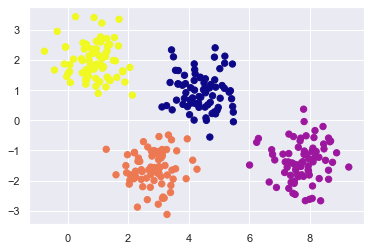

In [1]:
from sklearn import mixture

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import numpy as np

# Generating the data
from sklearn.datasets import make_blobs

X, y_t = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]  # flip axes for better plotting
gmix = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmix.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="plasma")
rng = np.random.RandomState(13)

GMM uses EM approach, which followed by certain steps given below

*   Picking or choosing location and shapes
*   E-step : for every point, find the weight encoding the probability of data in each cluster
*   M-step : for every cluster, updates normalization, shape, and location based on all the data by using weight calculated. 



The result obtained is a smooth elliptical shapes based in GMM model .



A significant perception for k-implies is that these clusters models should be circular in shape whereas k-implies has no inherent approach to representing elongated or circular groups. Thus, for instance, assuming we take same data and change it, the group tasks wind up becoming complicated. Thus the calculation or obtaining hiddel label, center, variance/covariance of matrices of the distribution, height, angle, width is very much important to obtain the eplitical shape and this can be done using SVD for calculation of matric and also it convert covariance to pricipal axes.

In [3]:
from matplotlib.patches import Ellipse


def draw_ellipse(position, covar, ax=None, **kwargs):
    """Drawing an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covar.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covar)
        ang = np.degrees(np.arctan2(U[1, 0], U[0, 0]))  # angle
        w, h = 2 * np.sqrt(s)
        # width and height
    else:
        ang = 0  # angle
        w, h = 2 * np.sqrt(covar)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * w, nsig * h, ang, **kwargs))


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis", zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis("equal")

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

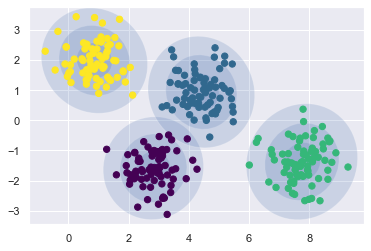

In [5]:
gmmodel = mixture.GaussianMixture(n_components=4, random_state=42).fit(X)
plot_gmm(gmmodel, X)

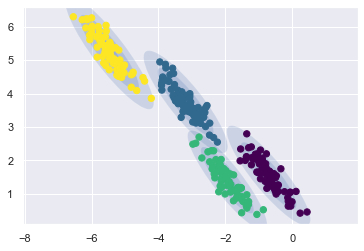

In [7]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
gmmodel = mixture.GaussianMixture(
    n_components=4, covariance_type="full", random_state=42
)
plot_gmm(gmmodel, X_stretched)



```{admonition} References:
Here are the sources :
[\[Mixture Models\]](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb)
 


```


<footer>
Author(s): Tare Adithya,Abhinav Singh,Devendhar
<footer>